In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 导入sklearn diabetes数据接口
from sklearn.datasets import load_diabetes
# 导入sklearn打乱数据函数
from sklearn.utils import shuffle

首先如下设定：
- m： 样本数量，即数据的行数
- n： 特征数量

In [2]:
def initialize_params(dims: int) -> np.ndarray:
    """根据输入的值生成对应尺寸的权重向量和偏置

    Args:
        dims (int): 特征的数量 (输入变量维度), 换句话说传入的 n

    Returns:
        np.ndarray: 含有权重和偏置的矩阵，其形状为 n + 1 x 1，n为特征的数量
    """
    params = np.zeros((dims+1, 1))

    return params

In [3]:
def linear_loss(X:np.ndarray, y:np.ndarray, w_hat:np.ndarray) \
                -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """计算预测，均方损失和梯度

    Args:
        X (np.ndarray): 输入变量矩阵
        y (np.ndarray): 真实标签向量
        w_hat (np.ndarray): 权重矩阵

    Returns:
        tuple[np.ndarray, np.ndarray, np.ndarray, float]: 
            y_hat: 模型预测值
            loss: 当前的均方损失 (MSE)
            grad: 权重 w 的梯度和偏置 b 的梯度组成的矩阵
    """
    # m为行 n为列(特征)
    m = X.shape[0]
    n = X.shape[1]

    y_hat = X @ w_hat[:-1] + w_hat[-1]

    loss = np.sum((y_hat - y) ** 2) / m

    X_b = np.hstack((X, np.ones((1, m)).T))

    grad = (X_b.T @ (X_b @ w_hat - y) * 2) / m

    return y_hat, loss, grad


In [4]:
def linear_train(X:np.ndarray, y:np.ndarray, learning_rate:float=0.01, epochs:int=10000) \
                -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """数据训练定义线性回归模型训练过程
       它会调用上面两个函数

    Args:
        X (np.ndarray): 训练数据，输入变量矩阵
        y (np.ndarray): 训练数据，输出标签向量
        learning_rate (float, optional): 学习率. Defaults to 0.01.
        epochs (int, optional): 迭代次数. Defaults to 10000.

    Returns:
        tuple[np.ndarray, np.ndarray, np.ndarray]: 
            loss_his: 每次迭代的损失值列表 (用于画图)
            w_hat: 包含最终优化后的 'w' 和 'b' 的矩阵
            grads: 最终的梯度字典
    """
    w_hat = initialize_params(X.shape[1])

    loss_his = []

    for epoch in range(epochs):
        y_hat, loss, grads = linear_loss(X, y, w_hat)

        w_hat -= grads * learning_rate

        loss_his.append(loss)

    return loss_his, w_hat, grads

In [5]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 4, 6, 8]).reshape(-1, 1)
# X.shape
loss_his, params, grads = linear_train(X, y)

In [6]:

# 获取diabetes数据集
diabetes = load_diabetes()
# 获取输入和标签
data, target = diabetes.data, diabetes.target 
# 打乱数据集
X, y = shuffle(data, target, random_state=13)
# 按照8/2划分训练集和测试集
offset = int(X.shape[0] * 0.8)
# 训练集
X_train, y_train = X[:offset], y[:offset]
# 测试集
X_test, y_test = X[offset:], y[offset:]
# 将训练集改为列向量的形式
y_train = y_train.reshape((-1,1))
# 将验证集改为列向量的形式
y_test = y_test.reshape((-1,1))
# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (353, 10)
X_test's shape:  (89, 10)
y_train's shape:  (353, 1)
y_test's shape:  (89, 1)


In [7]:
loss_his, params, grads = linear_train(X_train, y_train, epochs=200000)

In [8]:
def predict(X:np.ndarray, params:np.ndarray) -> np.ndarray:
    """使用训练好的参数进行预测

    Args:
        X (np.ndarray): 需要预测的数据
        params (np.ndarray): 模型参数，形状为（m * (n + 1)）,+1为偏置

    Returns:
        np.ndarray: 返回的预测结果y_hat
    """
    X_b = np.hstack((X, np.ones((1,  X.shape[0])).T))

    y_hat = X_b @ params

    return y_hat

In [9]:
y_pred = predict(X_test, params)

In [10]:
def r2_score(y_test:np.ndarray, y_pred:np.ndarray) -> np.float64:
    """r2得分，通过预测结果和真实结果进行对比,看看差距有多大

    Args:
        y_test (np.ndarray): 真实的标签（结果）
        y_pred (np.ndarray): 预测的结果

    Returns:
        np.float64: R² 系数 (越接近 1 越好)
    """
    y_mean = np.mean(y_test)

    res = np.sum((y_test - y_pred) ** 2)
    tot = np.sum((y_test - y_mean) ** 2)

    return 1 - res/tot


In [11]:
r2_score(y_test, y_pred)

np.float64(0.5349348222340631)

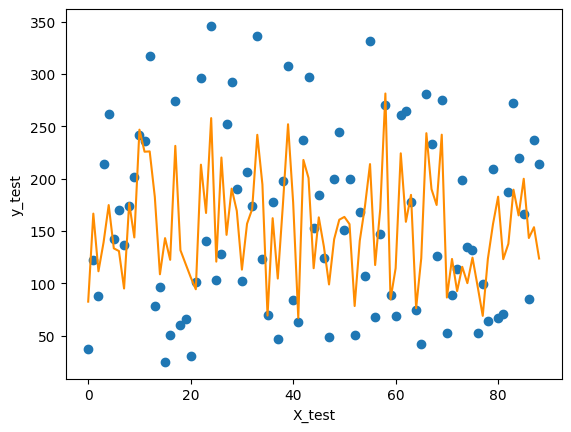

In [ ]:
plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(y_pred, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show();

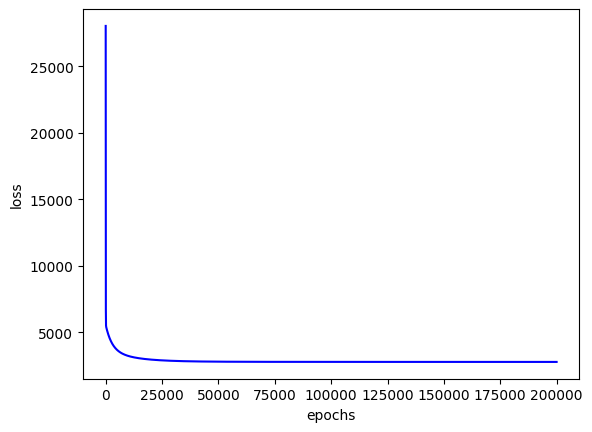

In [13]:
plt.plot(loss_his, color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()